In [201]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error as MAE, explained_variance_score, mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
import xgboost as xg

In [202]:
from math import sqrt
from scipy import stats
from pygam import LinearGAM

In [203]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
df = pd.read_csv(r'file:///C:\Users\ejmason\Documents\ArcGIS\Projects\AADT%20Prediction\AADT_Prediction_All_TableToExcel.csv')

In [206]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,OBJECTID,Event_ID,Route_ID,From_MPT,To_MPT,Traffic_Link_ID,AADT,AADT_Year,Seg_Length_Miles,Route_Name,Functional_Class,Road_Surface,Facility_Type,HPMS_Grade_Class,Lane_Width,Through_Lanes,ID,NAME,STATE_NAME,ST_ABBREV,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,CIVLBFR_CY,EMP_CY,UNEMP_CY,UNEMPRT_CY,DIVINDX_CY,MEDHINC_CY,AVGHINC_CY,PCI_CY,HINCBASECY,MEDVAL_CY,AVGVAL_CY,Region,FIPS,BOROUGH_ID,BOROUGH,FIPS_CNTY,Shape_Length
0,1,{8D079B94-C3A4-40A8-AE49-42E5CC8D2521},1000000R001,-2.000000e-08,0.055534,AL000296,3977,2019,0.055534,Sterling SB Wye (Kenai Spur) (Sterling Highway),1.0,1,91,B,19.0,1,99669,Soldotna,Alaska,AK,14387,14212,17.2,5640,2.52,7870,7337,533,6.8,32.0,68351,87945,34892,5640,245638,273799,1,122,6,KENAI PENINSULA BOROUGH,122,181.544009
1,2,{854D715E-F841-4B3A-BADD-23B5560BEC36},1000000X000,-2.000000e-08,0.578787,AL000170,2063,2019,0.578787,Sterling Highway (Sterling Highway),1.0,1,96,B,15.0,2,99631,Moose Pass,Alaska,AK,218,213,1.1,91,2.34,152,137,15,9.9,21.1,74190,92340,39343,91,334783,323106,1,122,6,KENAI PENINSULA BOROUGH,122,1893.250472
2,3,{343EE823-F7CA-4150-99A8-46F388B3D3E2},1000000X000,1.796364e+01,21.700538,AL000163,3795,2019,3.736898,Sterling Highway (Sterling Highway),6.0,1,96,B,14.0,2,99572,Cooper Landing,Alaska,AK,366,357,0.3,185,1.93,253,229,24,9.5,22.0,74602,91725,47158,185,334444,324630,1,122,6,KENAI PENINSULA BOROUGH,122,12221.147720
3,4,{D887B53D-4E28-42B2-BE16-C48C08F03E7D},1000000X000,1.562891e+01,17.963640,AL000164,3229,2019,2.334728,Sterling Highway (Sterling Highway),NaN,1,96,A,12.0,2,99572,Cooper Landing,Alaska,AK,366,357,0.3,185,1.93,253,229,24,9.5,22.0,74602,91725,47158,185,334444,324630,1,122,6,KENAI PENINSULA BOROUGH,122,7632.962885
4,5,{6CC38470-1A7A-4A63-8BE0-4DD73A9F6C49},1000000X000,1.110782e+01,15.628912,AL002732,3998,2019,4.521093,Sterling Highway (Sterling Highway),6.0,1,96,C,12.0,2,99572,Cooper Landing,Alaska,AK,366,357,0.3,185,1.93,253,229,24,9.5,22.0,74602,91725,47158,185,334444,324630,1,122,6,KENAI PENINSULA BOROUGH,122,14778.712140


In [207]:
df.isnull().sum()

OBJECTID              0
Event_ID              0
Route_ID              0
From_MPT              0
To_MPT                0
Traffic_Link_ID       0
AADT                  0
AADT_Year             0
Seg_Length_Miles      0
Route_Name            0
Functional_Class    893
Road_Surface          0
Facility_Type         0
HPMS_Grade_Class    579
Lane_Width          238
Through_Lanes         0
ID                    0
NAME                  0
STATE_NAME            0
ST_ABBREV             0
TOTPOP_CY             0
HHPOP_CY              0
POPDENS_CY            0
TOTHH_CY              0
AVGHHSZ_CY            0
CIVLBFR_CY            0
EMP_CY                0
UNEMP_CY              0
UNEMPRT_CY            0
DIVINDX_CY            0
MEDHINC_CY            0
AVGHINC_CY            0
PCI_CY                0
HINCBASECY            0
MEDVAL_CY             0
AVGVAL_CY             0
Region                0
FIPS                  0
BOROUGH_ID            0
BOROUGH               0
FIPS_CNTY             0
Shape_Length    

In [208]:
df['Functional_Class'] = df.Functional_Class.fillna(method="Bfill")
df['Functional_Class'] = df.Functional_Class.fillna(method="Ffill")

In [209]:
corr = df.corr()

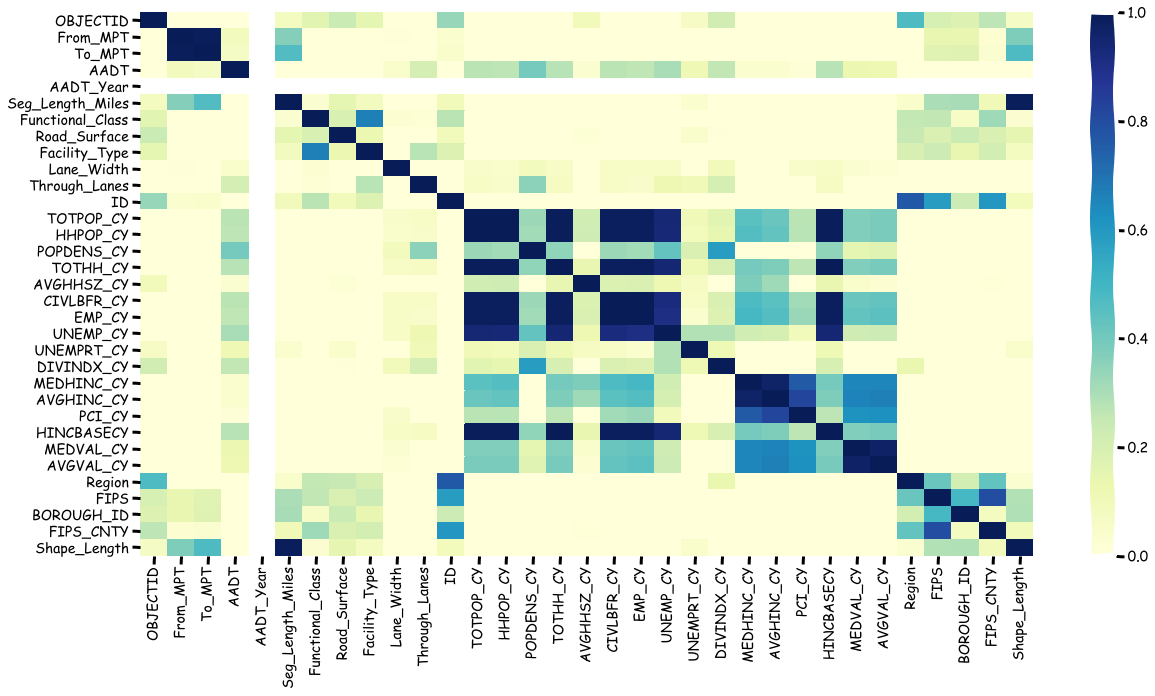

In [210]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, vmin=0, vmax=1, cmap="YlGnBu", ax = ax);

In [211]:
corr_great = corr.loc[corr['AADT']>.2]

In [212]:
corr.shape

(33, 33)

In [213]:
corr_great.shape

(11, 33)

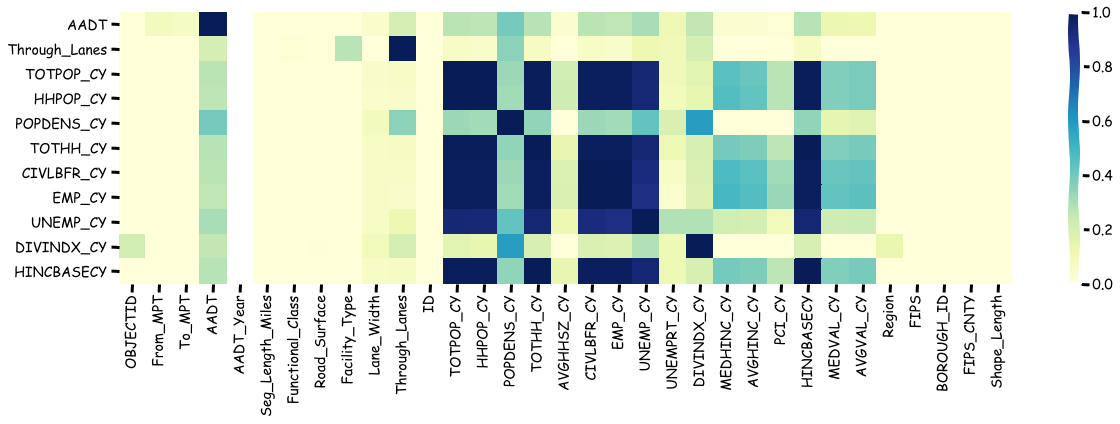

In [214]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr_great, vmin=0, vmax=1, cmap="YlGnBu", ax = ax);

In [215]:
corr_great.index

Index(['AADT', 'Through_Lanes', 'TOTPOP_CY', 'HHPOP_CY', 'POPDENS_CY',
       'TOTHH_CY', 'CIVLBFR_CY', 'EMP_CY', 'UNEMP_CY', 'DIVINDX_CY',
       'HINCBASECY'],
      dtype='object')

In [216]:
corr_list = ['Traffic_Link_ID','AADT', 'Through_Lanes', 'TOTPOP_CY', 'HHPOP_CY', 'POPDENS_CY',
       'TOTHH_CY', 'CIVLBFR_CY', 'EMP_CY', 'UNEMP_CY', 'DIVINDX_CY',
       'HINCBASECY']

In [217]:
df_corr = df.loc[:, corr_list]

In [218]:
df_corr.columns

Index(['Traffic_Link_ID', 'AADT', 'Through_Lanes', 'TOTPOP_CY', 'HHPOP_CY',
       'POPDENS_CY', 'TOTHH_CY', 'CIVLBFR_CY', 'EMP_CY', 'UNEMP_CY',
       'DIVINDX_CY', 'HINCBASECY'],
      dtype='object')

In [219]:
df_corr = df_corr.set_index('Traffic_Link_ID')

In [220]:
col_list = df.columns.tolist()

In [221]:
col_list = ['Traffic_Link_ID',
 'AADT',
 'Functional_Class',
 'Road_Surface',
 'Facility_Type',
 'HPMS_Grade_Class',
 'Lane_Width',
 'Through_Lanes',
 'TOTPOP_CY',
 'HHPOP_CY',
 'POPDENS_CY',
 'TOTHH_CY',
 'AVGHHSZ_CY',
 'CIVLBFR_CY',
 'EMP_CY',
 'UNEMP_CY',
 'UNEMPRT_CY',
 'DIVINDX_CY',
 'PCI_CY',
 'HINCBASECY',
 'MEDVAL_CY',
 'AVGVAL_CY',
 'Region',
 'FIPS',
 'BOROUGH_ID',
 'FIPS_CNTY',]

In [222]:
col_list

['Traffic_Link_ID',
 'AADT',
 'Functional_Class',
 'Road_Surface',
 'Facility_Type',
 'HPMS_Grade_Class',
 'Lane_Width',
 'Through_Lanes',
 'TOTPOP_CY',
 'HHPOP_CY',
 'POPDENS_CY',
 'TOTHH_CY',
 'AVGHHSZ_CY',
 'CIVLBFR_CY',
 'EMP_CY',
 'UNEMP_CY',
 'UNEMPRT_CY',
 'DIVINDX_CY',
 'PCI_CY',
 'HINCBASECY',
 'MEDVAL_CY',
 'AVGVAL_CY',
 'Region',
 'FIPS',
 'BOROUGH_ID',
 'FIPS_CNTY']

In [223]:
df_reduced = df.loc[:, col_list]

In [224]:
dummy_list = []

In [225]:
dummy_list = df.iloc[:,10:16].columns.tolist()

In [226]:
dummy_list

['Functional_Class',
 'Road_Surface',
 'Facility_Type',
 'HPMS_Grade_Class',
 'Lane_Width',
 'Through_Lanes']

In [227]:
dummy_list.extend(df.iloc[:, 36:40].columns)

In [228]:
dummy_list

['Functional_Class',
 'Road_Surface',
 'Facility_Type',
 'HPMS_Grade_Class',
 'Lane_Width',
 'Through_Lanes',
 'Region',
 'FIPS',
 'BOROUGH_ID',
 'BOROUGH']

In [229]:
dummy_list.remove('Lane_Width')

In [230]:
dummy_list.remove('BOROUGH')

In [231]:
prefix_list = []
for i in dummy_list:
    prefix_list.append(str(i[:1])+str(i[-1:]))
    print(str(i[:1])+str(i[-1:]))
    

Fs
Re
Fe
Hs
Ts
Rn
FS
BD


In [232]:
prefix_list

['Fs', 'Re', 'Fe', 'Hs', 'Ts', 'Rn', 'FS', 'BD']

In [268]:
for dummy in dummy_list:
    print(dummy)
        
    df_dummy = pd.get_dummies(df[dummy], prefix=dummy[:2])
    print(df_dummy.shape)
    if dummy not in df_dummy.columns:
        df = pd.concat([df_dummy,df], axis=1)

Functional_Class
(3513, 6)
Road_Surface
(3513, 3)
Facility_Type
(3513, 10)
HPMS_Grade_Class
(3513, 6)
Through_Lanes
(3513, 6)


In [233]:
def get_all_dummies(df, dummy_list, prefix_list):
    
    for dummy in dummy_list:
        df_dummy = pd.get_dummies(df[dummy], prefix=dummy[:2])
        if dummy not in df_dummy.columns:
            df = pd.concat([df_dummy,df], axis=1)
            
    return df
df_clean = get_all_dummies(df, dummy_list, prefix_list)

In [234]:
df_clean.columns

Index(['BO_1', 'BO_2', 'BO_3', 'BO_4', 'BO_5', 'BO_6', 'BO_7', 'BO_8', 'BO_9',
       'BO_10',
       ...
       'PCI_CY', 'HINCBASECY', 'MEDVAL_CY', 'AVGVAL_CY', 'Region', 'FIPS',
       'BOROUGH_ID', 'BOROUGH', 'FIPS_CNTY', 'Shape_Length'],
      dtype='object', length=125)

In [235]:
df_final = df_clean.drop(['OBJECTID',
       'Event_ID', 'Route_ID', 'From_MPT', 'To_MPT',
              'AADT_Year', 'Route_Name',
             'Functional_Class',
       'Road_Surface', 'Facility_Type', 'HPMS_Grade_Class', 'Lane_Width',
       'Through_Lanes', 'ID', 'NAME', 'STATE_NAME', 'ST_ABBREV','BOROUGH', 'Shape_Length'], axis=1)

In [236]:
df_model = df_final.set_index('Traffic_Link_ID')

In [290]:
df_model.head()

,BO_1,BO_2,BO_3,BO_4,BO_5,BO_6,BO_7,BO_8,BO_9,BO_10,BO_11,BO_12,BO_13,BO_14,BO_15,BO_16,BO_17,BO_18,BO_19,BO_99,FI_13,FI_16,FI_20,FI_50,FI_60,FI_68,FI_70,FI_90,FI_100,FI_105,FI_110,FI_122,FI_130,FI_150,FI_158,FI_164,FI_170,FI_180,FI_185,FI_188,FI_195,FI_198,FI_220,FI_230,FI_240,FI_261,FI_275,FI_282,FI_290,Re_1,Re_2,Re_3,Th_1,Th_2,Th_3,Th_4,Th_5,Th_6,HP_A,HP_B,HP_C,HP_D,HP_E,HP_F,Fa_4,Fa_6,Fa_91,Fa_92,Fa_93,Fa_94,Fa_95,Fa_96,Fa_97,Fa_99,Ro_1,Ro_2,Ro_3,Fu_1.0,Fu_3.0,Fu_4.0,Fu_5.0,Fu_6.0,Fu_7.0,AADT,Seg_Length_Miles,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,CIVLBFR_CY,EMP_CY,UNEMP_CY,UNEMPRT_CY,DIVINDX_CY,MEDHINC_CY,AVGHINC_CY,PCI_CY,HINCBASECY,MEDVAL_CY,AVGVAL_CY,Region,FIPS,BOROUGH_ID,FIPS_CNTY
Traffic_Link_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AL000296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3977,0.055534,14387,14212,17.2,5640,2.52,7870,7337,533,6.8,32.0,68351,87945,34892,5640,245638,273799,1,122,6,122
AL000170,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,2063,0.578787,218,213,1.1,91,2.34,152,137,15,9.9,21.1,74190,92340,39343,91,334783,323106,1,122,6,122
AL000163,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,3795,3.736898,366,357,0.3,185,1.93,253,229,24,9.5,22.0,74602,91725,47158,185,334444,324630,1,122,6,122
AL000164,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,3229,2.334728,366,357,0.3,185,1.93,253,229,24,9.5,22.0,74602,91725,47158,185,334444,324630,1,122,6,122
AL002732,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,3998,4.521093,366,357,0.3,185,1.93,253,229,24,9.5,22.0,74602,91725,47158,185,334444,324630,1,122,6,122


In [237]:
for i, val in enumerate(df_model.columns):
    print(f'{i}, {val}')

0, BO_1
1, BO_2
2, BO_3
3, BO_4
4, BO_5
5, BO_6
6, BO_7
7, BO_8
8, BO_9
9, BO_10
10, BO_11
11, BO_12
12, BO_13
13, BO_14
14, BO_15
15, BO_16
16, BO_17
17, BO_18
18, BO_19
19, BO_99
20, FI_13
21, FI_16
22, FI_20
23, FI_50
24, FI_60
25, FI_68
26, FI_70
27, FI_90
28, FI_100
29, FI_105
30, FI_110
31, FI_122
32, FI_130
33, FI_150
34, FI_158
35, FI_164
36, FI_170
37, FI_180
38, FI_185
39, FI_188
40, FI_195
41, FI_198
42, FI_220
43, FI_230
44, FI_240
45, FI_261
46, FI_275
47, FI_282
48, FI_290
49, Re_1
50, Re_2
51, Re_3
52, Th_1
53, Th_2
54, Th_3
55, Th_4
56, Th_5
57, Th_6
58, HP_A
59, HP_B
60, HP_C
61, HP_D
62, HP_E
63, HP_F
64, Fa_4
65, Fa_6
66, Fa_91
67, Fa_92
68, Fa_93
69, Fa_94
70, Fa_95
71, Fa_96
72, Fa_97
73, Fa_99
74, Ro_1
75, Ro_2
76, Ro_3
77, Fu_1.0
78, Fu_3.0
79, Fu_4.0
80, Fu_5.0
81, Fu_6.0
82, Fu_7.0
83, AADT
84, Seg_Length_Miles
85, TOTPOP_CY
86, HHPOP_CY
87, POPDENS_CY
88, TOTHH_CY
89, AVGHHSZ_CY
90, CIVLBFR_CY
91, EMP_CY
92, UNEMP_CY
93, UNEMPRT_CY
94, DIVINDX_CY
95, MEDHINC_C

In [238]:
df_model.iloc[:, 82:84].columns

Index(['Fu_7.0', 'AADT'], dtype='object')

In [239]:
df_binary = df_model.iloc[:, :84]

In [240]:
df_model.iloc[:, 102:105].columns

Index(['FIPS', 'BOROUGH_ID', 'FIPS_CNTY'], dtype='object')

In [241]:
df_cont = df_model.iloc[:, 83:101]

In [242]:
df_cont.columns

Index(['AADT', 'Seg_Length_Miles', 'TOTPOP_CY', 'HHPOP_CY', 'POPDENS_CY',
       'TOTHH_CY', 'AVGHHSZ_CY', 'CIVLBFR_CY', 'EMP_CY', 'UNEMP_CY',
       'UNEMPRT_CY', 'DIVINDX_CY', 'MEDHINC_CY', 'AVGHINC_CY', 'PCI_CY',
       'HINCBASECY', 'MEDVAL_CY', 'AVGVAL_CY'],
      dtype='object')

In [243]:
X = df_model.drop('AADT',axis=1)
y = np.array(df_model.loc[:, 'AADT'])

In [244]:
X_bin = df_binary.drop('AADT',axis=1)
y_bin = np.array(df_binary.loc[:, 'AADT'])

In [245]:
X_cont = df_cont.drop('AADT',axis=1)
y_cont = np.array(df_cont.loc[:, 'AADT'])

In [30]:
df_corr.head()

,AADT,Through_Lanes,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,CIVLBFR_CY,EMP_CY,UNEMP_CY,DIVINDX_CY,HINCBASECY
0,3977,1,14387,14212,17.2,5640,7870,7337,533,32.0,5640
1,2063,2,218,213,1.1,91,152,137,15,21.1,91
2,3795,2,366,357,0.3,185,253,229,24,22.0,185
3,3229,2,366,357,0.3,185,253,229,24,22.0,185
4,3998,2,366,357,0.3,185,253,229,24,22.0,185


In [246]:
X_corr = df_corr.drop('AADT',axis=1)
y_corr = df_corr.AADT

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [248]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=12)

In [249]:
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(X_cont, y_cont, test_size=0.2, random_state=12)

In [250]:
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, y_corr, test_size=0.2, random_state=12)

In [251]:
gam = LinearGAM(n_splines=10)

In [252]:
gam.fit(X_train_corr, y_train_corr)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + intercept,
   tol=0.0001, verbose=False)

In [253]:
gam_pred = gam.predict(X_test_corr)

In [254]:
evaluate_model(gam,gam_pred,y_test_corr)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + intercept,
   tol=0.0001, verbose=False) r2 score: 0.21736366589013556
LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + intercept,
   tol=0.0001, verbose=False) rmse: 6775.946283395049
LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + intercept,
   tol=0.0001, verbose=False) mae: 3695.590361042563
LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + intercept,
   tol=0.0001, verbose=False) explained variance: 0.21748446611040229


In [151]:
gam_pred[0]

1461.9999993816837

In [152]:
y_test_corr[0]

1462

In [153]:
gam_pred[300]

56.999992690203726

In [154]:
y_test_corr[300]

57

In [98]:
df_gam = pd.DataFrame(dict(s1 = gam_pred, s2 = y_test_corr))

In [102]:
df_gam['difference'] = abs((df_gam.s2-df_gam.s1)/df_gam.s1)*100

In [133]:
df_gam = df_gam.reset_index()

In [134]:
df_gam

,Traffic_Link_ID,s1,s2,difference
0,AL002779,4235.826810,1462,65.484897
1,AL001073,971.058589,1079,11.115849
2,AL000569,10455.133955,3406,67.422703
3,AL100208,2906.082422,1878,35.376919
4,AL000913,4235.826810,11372,168.471789
5,AL001515,5604.025262,7202,28.514767
6,AL001757,448.220008,209,53.371113
7,AL100110,7430.572955,2939,60.447195
8,AL001889,2615.376109,1090,58.323394
9,AL200045,2535.743726,746,70.580623


In [107]:
df_corr.Through_Lanes.value_counts()


2    2857
1     315
4     201
3     128
6       7
5       5
Name: Through_Lanes, dtype: int64

In [108]:
df_compare = pd.concat([df_corr, df_gam], axis=1)

In [112]:
df_corr.shape

(3513, 11)

In [113]:
df_gam.shape

(703, 3)

In [115]:
X_train_corr.shape

(2810, 10)

In [116]:
y_train_corr.shape

(2810,)

In [155]:
X_pred = gam.predict(X_train_corr)

In [156]:
evaluate_model(gam, X_pred, y_train_corr)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + intercept,
   tol=0.0001, verbose=False) r2 score: 1.0
LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + intercept,
   tol=0.0001, verbose=False) rmse: 2.245895354396337e-05
LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + intercept,
   tol=0.0001, verbose=False) mae: 5.233058561325994e-06
LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + intercept,
   tol=0.0001, verbose=False) explained variance: 1.0


In [111]:
df_compare.loc[df_compare.Through_Lanes>4].sort_values('Through_Lanes')

,AADT,Through_Lanes,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,CIVLBFR_CY,EMP_CY,UNEMP_CY,DIVINDX_CY,HINCBASECY,s1,s2,difference
AL002649,8526,5,27604,27168,51.0,9418,13639,12890,749,41.7,9418,5331.506969,8526.0,59.917263
AL002650,12062,5,27604,27168,51.0,9418,13639,12890,749,41.7,9418,NaN,NaN,NaN
AL003026,1946,5,27604,27168,51.0,9418,13639,12890,749,41.7,9418,NaN,NaN,NaN
AL000730,9036,5,27604,27168,51.0,9418,13639,12890,749,41.7,9418,5331.506969,9036.0,69.483038
AL100211,3377,5,27604,27168,51.0,9418,13639,12890,749,41.7,9418,NaN,NaN,NaN
AL000697,17452,6,37190,35860,4955.4,13082,18878,16960,1918,80.6,13082,NaN,NaN,NaN
AL000363,45512,6,18139,16149,3196.0,8064,9301,8525,776,72.7,8064,8548.960916,45512.0,432.368793
AL000557,16961,6,37190,35860,4955.4,13082,18878,16960,1918,80.6,13082,NaN,NaN,NaN
AL000626,15115,6,10506,10476,2775.7,4278,6343,5895,448,68.7,4278,10479.147481,15115.0,44.238833
AL002327,1788,6,22992,22829,2473.3,8088,12735,12248,487,63.2,8088,NaN,NaN,NaN


<AxesSubplot:xlabel='s1', ylabel='s2'>

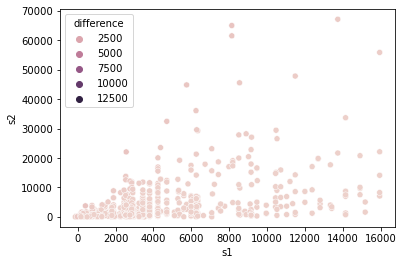

In [106]:
sns.scatterplot(data=df_gam, x='s1', y='s2', hue='difference')

In [86]:
X_test_corr.iloc[:1]

,AADT,Through_Lanes,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,CIVLBFR_CY,EMP_CY,UNEMP_CY,DIVINDX_CY,HINCBASECY
Traffic_Link_ID,,,,,,,,,,,
AL002779,1462,2,19644,18403,91.0,7918,9398,8444,954,66.8,7918


In [157]:
gam.predict(X_test_corr.iloc[:1])

array([1461.99999938])

In [49]:
def evaluate_model(model, model_pred, y_test):
        r2 = r2_score(y_test,model_pred)
        print(f'{model} r2 score: {r2}')
        rmse = np.sqrt(MSE(y_test, model_pred))
        print(f'{model} rmse: {rmse}')
        mae = MAE(y_test, model_pred)
        print(f'{model} mae: {mae}')
        evs = explained_variance_score(y_test, model_pred)
        print(f'{model} explained variance: {evs}')

In [215]:
svr = LinearSVR()
nusvr = NuSVR()
gbr = GradientBoostingRegressor()

In [160]:
svr.fit(X_train, y_train)

C:\Users\ejmason\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR()

In [216]:
svr_binary = svr.fit(X_train_binary, y_train_binary)

In [166]:
svr_cont = svr.fit(X_train_cont, y_train_cont)

C:\Users\ejmason\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
nusvr.fit(X_train, y_train)

NuSVR()

In [30]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [31]:
svr_pred = svr.predict(X_test)

In [217]:
svr_pred_binary = svr_binary.predict(X_test_binary)

In [228]:
svr_pred_binary[200]

2104.548157280081

In [231]:
X_test_binary.iloc[200].name

'AL002756'

In [240]:
df_model.loc[df_model['AADT']==57]

,FI_13,FI_20,FI_60,FI_68,FI_90,FI_99,FI_100,FI_110,FI_122,FI_130,FI_150,FI_164,FI_170,FI_185,FI_188,FI_195,FI_220,FI_230,FI_275,FI_282,BO_1,BO_2,BO_3,BO_4,BO_5,BO_6,BO_7,BO_8,BO_9,BO_10,BO_11,BO_12,BO_13,BO_14,BO_15,BO_16,BO_17,BO_18,BO_19,BO_99,FI_13,FI_16,FI_20,FI_50,FI_60,FI_68,FI_70,FI_90,FI_100,FI_105,FI_110,FI_122,FI_130,FI_150,FI_158,FI_164,FI_170,FI_180,FI_185,FI_188,FI_195,FI_198,FI_220,FI_230,FI_240,FI_261,FI_275,FI_282,FI_290,Re_1,Re_2,Re_3,Th_1,Th_2,Th_3,Th_4,Th_5,Th_6,HP_A,HP_B,HP_C,HP_D,HP_E,HP_F,Fa_4,Fa_6,Fa_91,Fa_92,Fa_93,Fa_94,Fa_95,Fa_96,Fa_97,Fa_99,Ro_1,Ro_2,Ro_3,Fu_1.0,Fu_3.0,Fu_4.0,Fu_5.0,Fu_6.0,Fu_7.0,AADT,Seg_Length_Miles,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,CIVLBFR_CY,EMP_CY,UNEMP_CY,UNEMPRT_CY,DIVINDX_CY,MEDHINC_CY,AVGHINC_CY,PCI_CY,HINCBASECY,MEDVAL_CY,AVGVAL_CY,Region,FIPS,BOROUGH_ID,FIPS_CNTY
Traffic_Link_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AL100275,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,57,0.739589,27803,27566,63.4,9797,2.81,12024,10747,1277,10.6,40.0,75626,92069,32729,9797,235250,277979,1,170,8,170
AL001363,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,57,7.438417,24350,24321,216.4,8611,2.82,12162,11554,608,5.0,42.9,84632,97316,34453,8611,229518,248714,2,90,9,90
AL003314,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,57,0.071219,836,836,2.0,349,2.40,518,483,35,6.8,66.7,52920,67604,28222,349,201389,257900,3,105,99,99
AL000008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,57,0.396076,250,248,1.2,78,3.18,76,63,13,17.1,15.0,32502,46410,14717,78,141667,164912,1,50,99,99
AL000113,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,57,3.191740,196,196,0.1,72,2.72,72,57,15,20.8,13.5,48195,59872,21994,72,175000,178922,1,50,99,99


In [242]:
df_model.iloc[300:301]

,FI_13,FI_20,FI_60,FI_68,FI_90,FI_99,FI_100,FI_110,FI_122,FI_130,FI_150,FI_164,FI_170,FI_185,FI_188,FI_195,FI_220,FI_230,FI_275,FI_282,BO_1,BO_2,BO_3,BO_4,BO_5,BO_6,BO_7,BO_8,BO_9,BO_10,BO_11,BO_12,BO_13,BO_14,BO_15,BO_16,BO_17,BO_18,BO_19,BO_99,FI_13,FI_16,FI_20,FI_50,FI_60,FI_68,FI_70,FI_90,FI_100,FI_105,FI_110,FI_122,FI_130,FI_150,FI_158,FI_164,FI_170,FI_180,FI_185,FI_188,FI_195,FI_198,FI_220,FI_230,FI_240,FI_261,FI_275,FI_282,FI_290,Re_1,Re_2,Re_3,Th_1,Th_2,Th_3,Th_4,Th_5,Th_6,HP_A,HP_B,HP_C,HP_D,HP_E,HP_F,Fa_4,Fa_6,Fa_91,Fa_92,Fa_93,Fa_94,Fa_95,Fa_96,Fa_97,Fa_99,Ro_1,Ro_2,Ro_3,Fu_1.0,Fu_3.0,Fu_4.0,Fu_5.0,Fu_6.0,Fu_7.0,AADT,Seg_Length_Miles,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,CIVLBFR_CY,EMP_CY,UNEMP_CY,UNEMPRT_CY,DIVINDX_CY,MEDHINC_CY,AVGHINC_CY,PCI_CY,HINCBASECY,MEDVAL_CY,AVGVAL_CY,Region,FIPS,BOROUGH_ID,FIPS_CNTY
Traffic_Link_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AL001910,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,34340,1.745232,40571,40203,384.1,14000,2.87,18898,17431,1467,7.8,38.8,84125,102349,35622,14000,269983,306213,1,170,8,170


In [241]:
y_test[300]

57

In [167]:
svr_pred_cont = svr_cont.predict(X_test_cont)

In [243]:
svr_pred_cont[0]

24133.290272930873

In [244]:
y_test[0]

1462

In [246]:
df_model.loc[df_model['AADT']==1462]

,FI_13,FI_20,FI_60,FI_68,FI_90,FI_99,FI_100,FI_110,FI_122,FI_130,FI_150,FI_164,FI_170,FI_185,FI_188,FI_195,FI_220,FI_230,FI_275,FI_282,BO_1,BO_2,BO_3,BO_4,BO_5,BO_6,BO_7,BO_8,BO_9,BO_10,BO_11,BO_12,BO_13,BO_14,BO_15,BO_16,BO_17,BO_18,BO_19,BO_99,FI_13,FI_16,FI_20,FI_50,FI_60,FI_68,FI_70,FI_90,FI_100,FI_105,FI_110,FI_122,FI_130,FI_150,FI_158,FI_164,FI_170,FI_180,FI_185,FI_188,FI_195,FI_198,FI_220,FI_230,FI_240,FI_261,FI_275,FI_282,FI_290,Re_1,Re_2,Re_3,Th_1,Th_2,Th_3,Th_4,Th_5,Th_6,HP_A,HP_B,HP_C,HP_D,HP_E,HP_F,Fa_4,Fa_6,Fa_91,Fa_92,Fa_93,Fa_94,Fa_95,Fa_96,Fa_97,Fa_99,Ro_1,Ro_2,Ro_3,Fu_1.0,Fu_3.0,Fu_4.0,Fu_5.0,Fu_6.0,Fu_7.0,AADT,Seg_Length_Miles,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,CIVLBFR_CY,EMP_CY,UNEMP_CY,UNEMPRT_CY,DIVINDX_CY,MEDHINC_CY,AVGHINC_CY,PCI_CY,HINCBASECY,MEDVAL_CY,AVGVAL_CY,Region,FIPS,BOROUGH_ID,FIPS_CNTY
Traffic_Link_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AL002779,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1462,0.041662,19644,18403,91.0,7918,2.32,9398,8444,954,10.2,66.8,54093,73219,31552,7918,201946,206320,2,90,9,90


In [32]:
nusvr_pred = nusvr.predict(X_test)

In [33]:
gbr_pred = gbr.predict(X_test)

In [247]:
gbr_pred[0]

7711.907833724505

In [248]:
y_test[0]

1462

In [37]:
evaluate_model(svr, svr_pred, y_test)

LinearSVR() r2 score: -0.19984433915815014
LinearSVR() rmse: 8389.815390902213
LinearSVR() mae: 6641.341105870945
LinearSVR() explained variance: 0.1192596196296184


In [163]:
evaluate_model(svr_binary, svr_pred_binary, y_test_binary)

LinearSVR() r2 score: -0.09257123935981748
LinearSVR() rmse: 8005.986129212599
LinearSVR() mae: 3526.2607272399873
LinearSVR() explained variance: 0.056293292749789225


In [168]:
evaluate_model(svr_cont, svr_pred_cont, y_test_cont)

LinearSVR() r2 score: -13.225931124122063
LinearSVR() rmse: 28888.853209947287
LinearSVR() mae: 27463.256046222898
LinearSVR() explained variance: -0.7245468600532732


In [38]:
evaluate_model(nusvr, nusvr_pred, y_test)

NuSVR() r2 score: -0.05669950344467689
NuSVR() rmse: 7873.461405468299
NuSVR() mae: 3858.409165478673
NuSVR() explained variance: 0.0011137932893220404


In [39]:
evaluate_model(gbr, gbr_pred, y_test)

GradientBoostingRegressor() r2 score: 0.19543049152141323
GradientBoostingRegressor() rmse: 6870.2372711440985
GradientBoostingRegressor() mae: 3720.2648220192136
GradientBoostingRegressor() explained variance: 0.19543141272459363


In [40]:
rmse = []

for K in range(25):
    K = K+1
    
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse.append(error)
    print(f'RMSE for {K} neighbors: {error}')

RMSE for 1 neighbors: 9546.859405917658
RMSE for 2 neighbors: 7860.889313181857
RMSE for 3 neighbors: 7229.963747200844
RMSE for 4 neighbors: 7412.577205267923
RMSE for 5 neighbors: 7174.298206781574
RMSE for 6 neighbors: 6993.719966812932
RMSE for 7 neighbors: 6794.858114557172
RMSE for 8 neighbors: 6802.686004648822
RMSE for 9 neighbors: 6827.910241104255
RMSE for 10 neighbors: 6859.693377320409
RMSE for 11 neighbors: 6784.455407588052
RMSE for 12 neighbors: 6774.825648512689
RMSE for 13 neighbors: 6791.7743549792895
RMSE for 14 neighbors: 6803.55760903359
RMSE for 15 neighbors: 6842.798654851628
RMSE for 16 neighbors: 6802.855686051806
RMSE for 17 neighbors: 6804.567392904452
RMSE for 18 neighbors: 6826.320495916779
RMSE for 19 neighbors: 6835.908391047962
RMSE for 20 neighbors: 6847.207436254807
RMSE for 21 neighbors: 6862.109144585923
RMSE for 22 neighbors: 6874.634032374564
RMSE for 23 neighbors: 6890.621735233807
RMSE for 24 neighbors: 6889.285180759605
RMSE for 25 neighbors: 69

<AxesSubplot:>

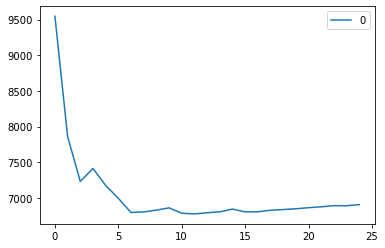

In [41]:
curve = pd.DataFrame(rmse)
curve.plot()

In [232]:
knn = KNeighborsRegressor(n_neighbors=12)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=12)

In [233]:
knn_binary = knn.fit(X_train_binary, y_train_binary)

In [234]:
knn_cont = knn.fit(X_train_cont, y_train_cont)

In [253]:
knn_binary_pred = knn_binary.predict(X_test_cont)

In [254]:
knn_binary_pred[0]

3058.75

In [235]:
knn_pred_cont = knn_cont.predict(X_test_cont)

In [249]:
knn_pred_cont[0]

3058.75

In [250]:
y_test[0]

1462

In [255]:
knn_pred = knn.predict(X_test)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 124 while Y.shape[1] == 17

In [44]:
evaluate_model(knn, knn_pred, y_test)

KNeighborsRegressor(n_neighbors=12) r2 score: 0.21762251595016524
KNeighborsRegressor(n_neighbors=12) rmse: 6774.825648512689
KNeighborsRegressor(n_neighbors=12) mae: 3714.4141773352303
KNeighborsRegressor(n_neighbors=12) explained variance: 0.21780665842739033


In [45]:
results = permutation_importance(knn, X_train, y_train, scoring='neg_mean_squared_error')

In [46]:
importance = results.importances_mean

Feature: 0, Score: -401220.01304
Feature: 1, Score: 335473.58453
Feature: 2, Score: -66257.38218
Feature: 3, Score: 217883.41480
Feature: 4, Score: 2737.14558
Feature: 5, Score: -1077.47526
Feature: 6, Score: 771531.47209
Feature: 7, Score: 143584.89540
Feature: 8, Score: 159030.48317
Feature: 9, Score: -8174.16456
Feature: 10, Score: 18927.59724
Feature: 11, Score: 12404.97469
Feature: 12, Score: 93611.71800
Feature: 13, Score: 169010.69380
Feature: 14, Score: 30.78310
Feature: 15, Score: 1095.99219
Feature: 16, Score: 27.25297
Feature: 17, Score: 6932.42532
Feature: 18, Score: -13810.26704
Feature: 19, Score: 11584.25501
Feature: 20, Score: -38.02372
Feature: 21, Score: 0.00000
Feature: 22, Score: 31721.67861
Feature: 23, Score: 32347.98372
Feature: 24, Score: 0.00000
Feature: 25, Score: -17482.28613
Feature: 26, Score: 340145.54414
Feature: 27, Score: 421027.80069
Feature: 28, Score: 70122.53339
Feature: 29, Score: 262916.34245
Feature: 30, Score: 239042.69061
Feature: 31, Score: 21

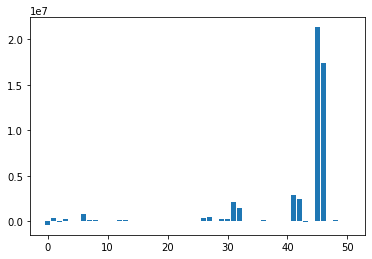

In [48]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [50]:
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [51]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [54]:
lr = LinearRegression()

In [74]:
xgrfs = xg.XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123)

In [56]:
lr.fit(X_train_fs, y_train)

LinearRegression()

In [75]:
xgrfs.fit(X_train_fs, y_train)

XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123)

In [57]:
lr_pred = lr.predict(X_test_fs)

In [76]:
xgrfs_pred = xgrfs.predict(X_test_fs)

In [61]:
evaluate_model(lr, lr_pred, y_test)

LinearRegression() r2 score: 0.07923761684435993
LinearRegression() rmse: 7349.600543195515
LinearRegression() mae: 4323.3014944456
LinearRegression() explained variance: 0.07938726518260864


In [77]:
evaluate_model(xgrfs, xgrfs_pred, y_test)

XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123) r2 score: 0.029783374508172145
XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123) rmse: 7544.393070349249
XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123) mae: 3776.3512632280463
XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123) explained variance: 0.06432749142690719


In [63]:
xgr = xg.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

In [64]:
xgr.fit(X_train, y_train)

XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123)

In [186]:
xgr_cont = xgr.fit(X_train_cont, y_train_cont)

In [188]:
xgr_cont_pred = xgr_cont.predict(X_test_cont)

In [256]:
xgr_cont_pred[0]

3042.2444

In [257]:
y_test[0]

1462

In [261]:
X_test.columns.size

124

In [265]:
len(X_test.columns.tolist())

124

In [266]:
len(set(X_test.columns))

105

In [258]:
xgr_pred = xgr.predict(X_test)

ValueError: feature_names must be unique

In [67]:
evaluate_model(xgr, xgr_pred, y_test)

XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123) r2 score: 0.14496171238314315
XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123) rmse: 7082.437202836736
XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123) mae: 3340.3714071737754
XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=123) explained variance: 0.18715636085979048


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.10942
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.04227
Feature: 7, Score: 0.01687
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.03482
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00650
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.03211
Feature: 26, Score: 0.03250
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01606
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.09736
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.39716
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

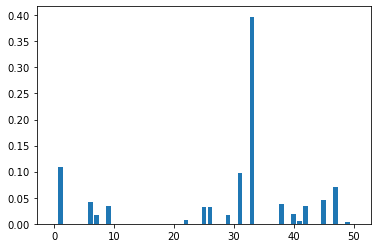

In [68]:
from matplotlib import pyplot
importance = xgr.feature_importances_
# summarize feature importance
important_list = []
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    if v > 0.01:
        important_list.append(v)
        
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [400]:
importance

array([0.        , 0.10951177, 0.        , 0.        , 0.        ,
       0.        , 0.04228603, 0.01688849, 0.        , 0.0348502 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00650162, 0.        , 0.        ,
       0.03202861, 0.03312559, 0.        , 0.        , 0.01473837,
       0.        , 0.09743729, 0.        , 0.39750355, 0.        ,
       0.        , 0.        , 0.        , 0.0370998 , 0.        ,
       0.01906498, 0.00475937, 0.0333629 , 0.        , 0.        ,
       0.04648814, 0.        , 0.0700888 , 0.        , 0.00426449,
       0.        ], dtype=float32)

In [69]:
np.array(important_list)

array([0.10942256, 0.04227024, 0.01687417, 0.03482045, 0.03210576,
       0.03249877, 0.01605646, 0.09735631, 0.39715964, 0.03706509,
       0.0190488 , 0.0333346 , 0.04645837, 0.07001639], dtype=float32)

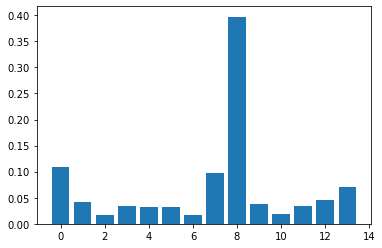

In [70]:
pyplot.bar([x for x in range(len(important_list))], important_list)
pyplot.show()

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
er.fit(X_train, y_train)
er_pred = er.predict(X_test)

In [106]:
lr.intercept_

3622.7329760092584

In [83]:
evaluate_model(er, er_pred, y_test)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1))]) r2 score: 0.18093403754767512
VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1))]) rmse: 6931.853738706496
VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1))]) mae: 3749.5993085857363
VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1))]) explai

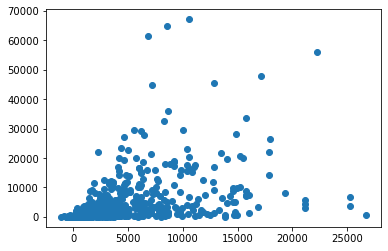

In [94]:
plt.scatter(er_pred, y_test)

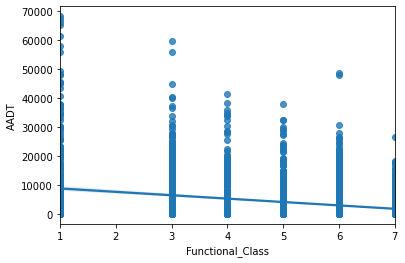

In [98]:
sns.regplot(x='Functional_Class', y="AADT", data=df);

In [100]:
df.Functional_Class.dtype

dtype('float64')

<AxesSubplot:xlabel='ID', ylabel='AADT'>

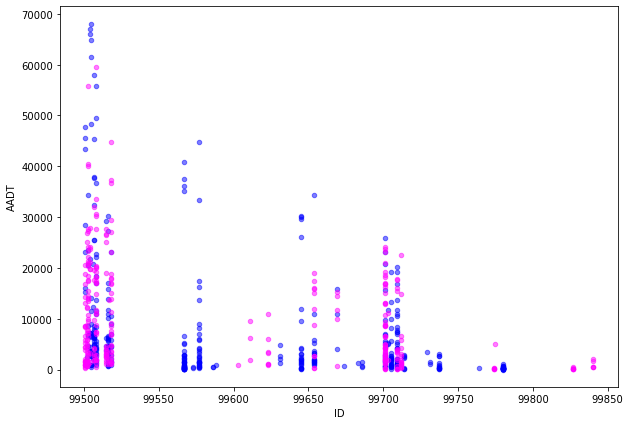

In [103]:
ax1 = df[df['Functional_Class'] == 1.0].plot(kind='scatter', x='ID', y='AADT', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Functional_Class'] == 3.0].plot(kind='scatter', x='ID', y='AADT', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)

In [108]:
pearson_coef, p_value = stats.pearsonr(df.AADT, df.ID)

In [110]:
p_value

1.0365589220973251e-68

In [158]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org -U concept_formation

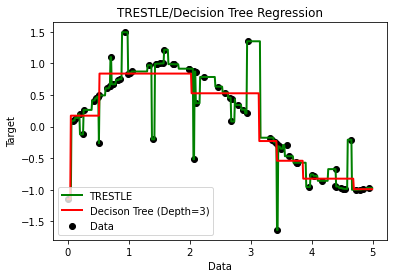

In [159]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from concept_formation.trestle import TrestleTree
import matplotlib.pyplot as plt
from random import seed

# Create a random dataset
rng = np.random.RandomState(1)
seed(0)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression models (Decision Tree and TRESTLE)
# For TRESTLE the y attribute is hidden, so only the X is used to make
# predictions.
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X, y)
ttree = TrestleTree()
training_data = [{'x': float(X[i][0]), '_y': float(y[i])} for i,v in
                 enumerate(X)]
ttree.fit(training_data, iterations=1)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_dtree = dtree.predict(X_test)
y_trestle = [ttree.categorize({'x': float(v)}).predict('_y') for v in X_test]

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="Data")
plt.plot(X_test, y_trestle, c="g", label="TRESTLE", linewidth=2)
plt.plot(X_test, y_dtree, c="r", label="Decison Tree (Depth=3)", linewidth=2)
plt.xlabel("Data")
plt.ylabel("Target")
plt.title("TRESTLE/Decision Tree Regression")
plt.legend(loc=3)
plt.show()

In [255]:
dtree = DecisionTreeRegressor(max_depth=15)
dtree.fit(X_train_corr, y_train_corr)

# Predict
y_dtree = dtree.predict(X_test_corr)

In [256]:
evaluate_model(dtree, y_dtree, y_test_corr)

DecisionTreeRegressor(max_depth=15) r2 score: 0.16961938263908238
DecisionTreeRegressor(max_depth=15) rmse: 6979.568163572493
DecisionTreeRegressor(max_depth=15) mae: 3801.187700923417
DecisionTreeRegressor(max_depth=15) explained variance: 0.1696906290516923


In [257]:
y_dtree[200]

3203.153846153846

In [258]:
y_test_corr[200]

1287

In [259]:
from sklearn.metrics import accuracy_score

In [264]:
def plot_train_test(model_class, value_range_max, parameter,other_param=None, other_value=None):
    
    
    train_scores, test_scores = list(), list()
    # define the tree depths to evaluate
    values = [i for i in range(1, value_range_max)]
    # evaluate a decision tree for each depth
    for i in values:
        # configure the model
        
        model = model_class(parameter=i)
        # fit model on the training dataset
        model.fit(X_train_corr, y_train_corr)
        # evaluate on the train dataset
        train_yhat = model.predict(X_train_corr)
        train_acc = r2_score(y_train_corr, train_yhat)
        train_scores.append(train_acc)
        # evaluate on the test dataset
        test_yhat = model.predict(X_test_corr)
        test_acc = r2_score(y_test_corr, test_yhat)
        test_scores.append(test_acc)
        # summarize progress
        print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    # plot of train and test scores vs tree depth
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, test_scores, '-o', label='Test')
    plt.legend()
    plt.show()

In [267]:
plot_train_test(DecisionTreeRegressor(), 21, 'max_depth')

TypeError: 'DecisionTreeRegressor' object is not callable

>1, train: 0.154, test: 0.116
>2, train: 0.216, test: 0.185
>3, train: 0.244, test: 0.174
>4, train: 0.274, test: 0.177
>5, train: 0.300, test: 0.172
>6, train: 0.312, test: 0.161
>7, train: 0.317, test: 0.184
>8, train: 0.321, test: 0.163
>9, train: 0.323, test: 0.158
>10, train: 0.323, test: 0.170
>11, train: 0.323, test: 0.170
>12, train: 0.323, test: 0.158
>13, train: 0.323, test: 0.158
>14, train: 0.323, test: 0.170
>15, train: 0.323, test: 0.170
>16, train: 0.323, test: 0.158
>17, train: 0.323, test: 0.170
>18, train: 0.323, test: 0.170
>19, train: 0.323, test: 0.158
>20, train: 0.323, test: 0.167


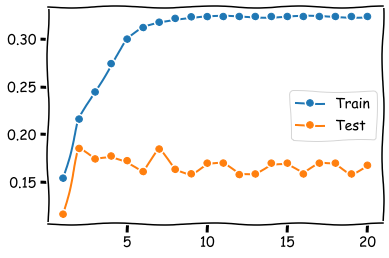

In [261]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeRegressor(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train_corr, y_train_corr)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_corr)
	train_acc = r2_score(y_train_corr, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_corr)
	test_acc = r2_score(y_test_corr, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

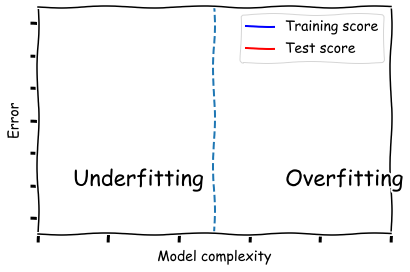